# WeRateDogs Data Wrangling

### Table of contents
- Introduction
- Gathering Data
 - Quality issues
 - Tidiness Issues
- Assessing Data
- Cleaning Data
- Storing, Analyzing and Visualizing Clean Data



## Introduction

In [123]:
import pandas as pd
import numpy as np
import tweepy
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import datetime
import json
import os
from IPython.display import Image
from IPython.core.display import HTML
% matplotlib inline

In [2]:
#Reading csv
enhanced_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#downloading data programatically and reading tsv
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
image_predictions = pd.read_csv('image-predictions.tsv', sep="\t")

In [4]:
#webscrapping twitter using tweepy
api_key = "9H7lzUw4Own5sAszCA5ucXU7C" 
api_secret = "otrDj2VR4bBvXZL9Y55yojCkcPrBj15AYKiHDtXFw9BYFwMQpE"
access_key = "1302287557309259777-z8RBDXO52KCYcd1AC00U24OxR5hiym"
access_secret = "CPWpjAbhNfJv8rcoxWjlzUG11u1rRSDe7WqTUpocQ0Q8y"
  
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_key, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
    
# Get tweet info
tweet = api.get_status(enhanced_archive.tweet_id[2000], tweet_mode='extended')

# Get json info
info = tweet._json
info

{'created_at': 'Thu Dec 03 18:52:12 +0000 2015',
 'id': 672488522314567680,
 'id_str': '672488522314567680',
 'full_text': 'This is Jackie. She was all ready to go out, but her friends just cancelled on her. 10/10 hang in there Jackie https://t.co/rVfi6CCidK',
 'truncated': False,
 'display_text_range': [0, 134],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 672488519928037376,
    'id_str': '672488519928037376',
    'indices': [111, 134],
    'media_url': 'http://pbs.twimg.com/media/CVUovvHWwAAD-nu.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CVUovvHWwAAD-nu.jpg',
    'url': 'https://t.co/rVfi6CCidK',
    'display_url': 'pic.twitter.com/rVfi6CCidK',
    'expanded_url': 'https://twitter.com/dog_rates/status/672488522314567680/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'large': {'w': 304, 'h': 411, 'resize': 'fit'},
     'small': {'w': 304, 'h': 411, 'resize': 'f

In [5]:
tweet_ids = list(enhanced_archive.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except:
        print("Error occured at tweet ID: " + str(tweet))


Error occured at tweet ID: 888202515573088257
Error occured at tweet ID: 873697596434513921
Error occured at tweet ID: 872668790621863937
Error occured at tweet ID: 872261713294495745
Error occured at tweet ID: 869988702071779329
Error occured at tweet ID: 866816280283807744
Error occured at tweet ID: 861769973181624320
Error occured at tweet ID: 856602993587888130
Error occured at tweet ID: 851953902622658560
Error occured at tweet ID: 845459076796616705
Error occured at tweet ID: 844704788403113984
Error occured at tweet ID: 842892208864923648
Error occured at tweet ID: 837366284874571778
Error occured at tweet ID: 837012587749474308
Error occured at tweet ID: 829374341691346946
Error occured at tweet ID: 827228250799742977
Error occured at tweet ID: 812747805718642688
Error occured at tweet ID: 802247111496568832
Error occured at tweet ID: 779123168116150273
Error occured at tweet ID: 775096608509886464
Error occured at tweet ID: 771004394259247104
Error occured at tweet ID: 7707439

In [6]:
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)

In [7]:
with open('tweet_json.txt') as file:
    data = json.load(file)
    
df_list = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']# + data[tweet_id]['favourites_count']
    df_list.append({'tweet_id': tweet_id,
                        'retweets': retweets,
                        'favorites': favorites})
    
twitter_data = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])
twitter_data.head()

,tweet_id,retweets,favorites
0,892420643555336193,7546,35691
1,892177421306343426,5594,30867
2,891815181378084864,3707,23207
3,891689557279858688,7727,38983
4,891327558926688256,8327,37238


In [8]:
twitter_data.to_csv('twitter_data.csv')

## Assessing

- enhanced_archive includes tweet's timestamp, text, ratings, and dog types
- image_predictions has the results of a neural network trying to identify dog breed in a tweet's picture
- twitter_data consists of number of retweets and favorites


### enhanced_archive
    

In [9]:
#Exploring 'enhanced_archive'
enhanced_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
enhanced_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
enhanced_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [12]:
enhanced_archive.duplicated().any()

False

In [13]:
enhanced_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
(enhanced_archive.loc[:,'doggo':'puppo']=="None").sum()

doggo      2259
floofer    2346
pupper     2099
puppo      2326
dtype: int64

In [15]:
(enhanced_archive.loc[:,'doggo':'puppo']!="None").sum()

doggo       97
floofer     10
pupper     257
puppo       30
dtype: int64

In [16]:
for column in enhanced_archive.columns[-4:]:
    print(column, enhanced_archive.text.str.contains(column).sum())

doggo 98
floofer 4
pupper 272
puppo 37


In [17]:
enhanced_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
enhanced_archive['tweet_id'].duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2326    False
2327    False
2328    False
2329    False
2330    False
2331    False
2332    False
2333    False
2334    False
2335    False
2336    False
2337    False
2338    False
2339    False
2340    False
2341    False
2342    False
2343    False
2344    False
2345    False
2346    False
2347    False
2348    False
2349    False
2350    False
2351    False
2352    False
2353    False
2354    False
2355    False
Name: tweet_id, Length: 2356, dtype: bool

In [19]:
enhanced_archive[enhanced_archive.tweet_id.duplicated()]            

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### image_predictions

In [20]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
image_predictions.shape

(2075, 12)

In [23]:
image_predictions.isnull().any()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

In [24]:
image_predictions.duplicated().any()

False

In [25]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### twitter_data

In [26]:
twitter_data.head()

,tweet_id,retweets,favorites
0,892420643555336193,7546,35691
1,892177421306343426,5594,30867
2,891815181378084864,3707,23207
3,891689557279858688,7727,38983
4,891327558926688256,8327,37238


In [27]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id     2331 non-null object
retweets     2331 non-null int64
favorites    2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [28]:
twitter_data.isnull().any()

tweet_id     False
retweets     False
favorites    False
dtype: bool

In [29]:
twitter_data.duplicated().any()

False

In [30]:
twitter_data.tweet_id.duplicated().any()

False

In [31]:
twitter_data.describe()

,retweets,favorites
count,2331.000000,2331.000000
mean,2652.651652,7457.072072
std,4486.355657,11577.678956
min,1.000000,0.000000
25%,537.000000,1297.000000
50%,1241.000000,3243.000000
75%,3080.500000,9136.000000
max,76234.000000,153874.000000


In [32]:
common_column = twitter_data.columns.intersection(enhanced_archive.columns.intersection(image_predictions.columns)) 
common_column

Index(['tweet_id'], dtype='object')

## describe areas of cleaning


Below, I have mentioned all the Quality and Tidiness issues
Quality

#### Twitter's archive - enchanced_archive

- many columns with missing values
- Invalid data types 
    - datetime: timestamp and retweeted_status_timestamp column
    - categorical: dog_stage column,
    - str: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id columns- columns name, doggo, floofer, pupper and puppo all having value as None
- invalid data for names such as a, an, all, officially
- Source column values are not clean

- rating_denominator value being other than assumed standard value of 10 at some places
- rating_numerator column has some exceptionally high values

#### Image predictions - image_predictions

- unclear column names
- duplicate predictions for images present for duplicate jpg_url with everything identical except for tweet ids

#### Twitter's programatically obtained data - twitter_data

- twitter_id is a string




## Cleaning

Cleaning your data is the third step in data wrangling. It is where we will fix the quality and tidiness issues that we identified in the assess step. Here, we'll resolve all of the issues mentioned above, one at a time

This will be viewed in sections of Define, Code and Test in this sequence.

### steps for cleaning

#### Twitter's archive - enchanced_archive

In [74]:
#Making copies of data
enhanced_archive_clean = enhanced_archive.copy()
image_predictions_clean = image_predictions.copy()
twitter_data_clean = twitter_data.copy()

In [75]:
dog_kinds = list(enhanced_archive_clean.columns[-4:])
dog_kinds

['doggo', 'floofer', 'pupper', 'puppo']

#### Define

 Dropping columns with missing values 


#### Code


In [76]:
#dropping columns with NAN

enhanced_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [77]:
enhanced_archive_clean.sample(5)

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
28,886680336477933568,2017-07-16 20:14:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Derek. He's late for a dog meeting. 13/10 pet...al to the metal https://t.co/BCoWue0abA,NaN,https://twitter.com/dog_rates/status/886680336477933568/photo/1,13,10,Derek,None,None,None,None
1759,678740035362037760,2015-12-21 00:53:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Tango. He's a large dog. Doesn't care much for personal space. Owner isn't very accepting. Tongue slip. 6/10 https://t.co/p2T5kGebxe,NaN,https://twitter.com/dog_rates/status/678740035362037760/photo/1,6,10,Tango,None,None,None,None
1898,674690135443775488,2015-12-09 20:40:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Patrick. He's an exotic pup. Jumps great distances for a dog. Always gets injured when I toss him a ball. 3/10 https://t.co/Unz1uNrOzo,NaN,https://twitter.com/dog_rates/status/674690135443775488/photo/1,3,10,Patrick,None,None,None,None
1067,740676976021798912,2016-06-08 22:48:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Baloo. He's expecting a fast ground ball, hence the wide stance. Prepared af. 11/10 nothing runs like a pupper https://t.co/sMbMw5Z2XC",NaN,https://twitter.com/dog_rates/status/740676976021798912/photo/1,11,10,Baloo,None,None,pupper,None
635,793601777308463104,2016-11-01 23:53:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dobby. I can't stop looking at her feet. 12/10 would absolutely snug https://t.co/LhzPWv6rTv,NaN,https://twitter.com/dog_rates/status/793601777308463104/photo/1,12,10,Dobby,None,None,None,None


#### Define

Replacing dog columns with suitable type

#### Code

In [78]:
enhanced_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] = enhanced_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', '')

In [79]:
enhanced_archive_clean['dog_category'] = enhanced_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ''.join(x), axis = 1)
enhanced_archive_clean['dog_category'].value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_category, dtype: int64

#### Test

In [80]:
enhanced_archive_clean.dog_category = enhanced_archive_clean.dog_category.replace(['doggofloofer', 'doggopupper', 'doggopuppo'], 'multiple')
enhanced_archive_clean['dog_category'].value_counts()

            1976
pupper       245
doggo         83
puppo         29
multiple      14
floofer        9
Name: dog_category, dtype: int64

#### Define
Datatype cleaning for timestamp in enhanced_archive_clean and tweet_id in twitter_data_clean.

#### Code

In [81]:
#timestap to datetime from object
enhanced_archive_clean.timestamp = pd.to_datetime(enhanced_archive_clean.timestamp)

#tweet_id from twitter_data_clean to int from string
twitter_data_clean.tweet_id = twitter_data_clean.tweet_id.astype(int)

#### Test

In [82]:
enhanced_archive_clean.dtypes

tweet_id                        int64
timestamp              datetime64[ns]
source                         object
text                           object
retweeted_status_id           float64
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dog_category                   object
dtype: object

In [83]:
twitter_data_clean.dtypes

tweet_id     int64
retweets     int64
favorites    int64
dtype: object

#### Define

Merging dataset for Tidiness 


#### Code

In [84]:
#merging columns enhanced_archive_clean and twitter_data_clean
twitter_data_clean = pd.merge(enhanced_archive_clean, twitter_data_clean, how="inner", on='tweet_id')

#### Test

In [124]:
twitter_data_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,dog_category,retweets,favorites
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN,7546,35691
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,pupper,5594,30867
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,3707,23207
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN,7727,38983
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN,8327,37238


#### Define

Dropping 'doggo', 'floofer', 'pupper', 'puppo' columns


#### Code

In [86]:
twitter_data_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'],axis=1, inplace=True)

#### Test

In [87]:
#testing columns
twitter_data_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_category', 'retweets', 'favorites'],
      dtype='object')

#### Define

Cleaning invalid names in twitter_data_clean.name by replacing them with 'Missing'

#### Code

In [88]:
#finding invalid name entries
invalid_names = twitter_data_clean[twitter_data_clean['name'].str.islower()].name
invalid_names.value_counts(), invalid_names.value_counts().sum()

(a               55
 the              8
 an               7
 very             5
 just             4
 one              4
 quite            3
 getting          2
 actually         2
 mad              2
 not              2
 space            1
 officially       1
 such             1
 incredibly       1
 infuriating      1
 unacceptable     1
 this             1
 my               1
 his              1
 by               1
 old              1
 all              1
 light            1
 life             1
 Name: name, dtype: int64, 108)

In [89]:
#replacing invalid name entries with 'Missing'
for _ in invalid_names:
    twitter_data_clean.name = twitter_data_clean.name.replace(_,'Missing')


#### Test

By comparing 'Missing' count with above invalid_names count

In [90]:
len(twitter_data_clean.query("name == 'Missing'"))

108

#### Define

Dog data into Categorical type


#### Code

In [91]:

# Collect the correct words for dog_stage interpretation in 4 variables for seperating 4 different dog_stages 
pupper = ['Pup', 'pup', 'pupper', 'Pupper', 'puppeters', 'puppy', 'Puppy', 'Pup.', 'pups.', 'puppers.', 'Pupper.', 'puppeters.', 'puppy.', 'Puppy.', 'pupper','PUPPER']
doggo = ['Doggo', 'doggo', 'dogg', 'Doggo.', 'doggo.', 'dogg.', 'doggo?', '(doggo)', 'DOGGO', ]
puppo = ['puppo', 'Puppo', 'Puppo.']
floofer = ['Floofer', 'floofs', 'floofer', 'floof', 'Floofy', 'floofy', 'floofs.', 'floof.', 'Floofy.', 'floofy.', 'Floofer.']

twitter_data_clean['dog_category_2'] = ''


for text in twitter_data_clean.text:
    y = twitter_data_clean[twitter_data_clean.text == text].index.values
    x = str(text).strip(".,").split(' ')
    for word in x:
        if word in pupper:
            twitter_data_clean.loc[y, 'dog_category_2'] = 'pupper'
        elif word in doggo:
            twitter_data_clean.loc[y, 'dog_category_2'] = 'doggo'
        elif word in puppo:
            twitter_data_clean.loc[y, 'dog_category_2'] = 'puppo'
        elif word in floofer:
            twitter_data_clean.loc[y, 'dog_category_2'] = 'floofer'
            



In [92]:
twitter_data_clean.dog_category = twitter_data_clean.dog_category_2


# Drop the new column and replace instances of empty string with NaN
twitter_data_clean['dog_category'] = twitter_data_clean['dog_category'].replace('', np.nan)
twitter_data_clean.drop('dog_category_2', axis=1, inplace=True)


#### Test

In [93]:
twitter_data_clean.dog_category.value_counts()

pupper     290
doggo       81
floofer     20
puppo       16
Name: dog_category, dtype: int64

#### Define

Correcting Dog Ratings by checking values denominator not equal to 10 and numerators less than 10

#### Code

In [94]:
#finding rating with denominator not being 10
pd.set_option('display.max_colwidth', 200)
twitter_data_clean[['text','rating_numerator','rating_denominator']].query('rating_denominator != 10')

,text,rating_numerator,rating_denominator
299,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
328,@docmisterio account started on 11/15/15,11,15
417,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
499,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
879,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1044,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1096,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1141,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1178,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1204,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90


In [95]:
#finding rating with denominator not being 10
pd.set_option('display.max_colwidth', 200)
twitter_data_clean[['text','rating_numerator','rating_denominator']].query('rating_numerator < 10')

,text,rating_numerator,rating_denominator
44,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
220,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6,10
301,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
371,"I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",7,10
446,RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,7,10
469,RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,9,10
581,RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…,8,10
587,RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,1,10
712,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,5,10
727,RT @dog_rates: This is Hank. He's mischievous af. Doesn't even know what he was trying to do here. 8/10 quit the shit Hank damn https://t.c…,8,10


In [96]:
# Replace the incorrect ratings with correct ratings
twitter_data_clean.loc[299, 'rating_numerator':'rating_denominator'] = [13, 10]

twitter_data_clean.loc[1044, 'rating_numerator':'rating_denominator'] = [14, 10]

twitter_data_clean.loc[1141, 'rating_numerator':'rating_denominator'] = [13, 10]

twitter_data_clean.loc[1178, 'rating_numerator':'rating_denominator'] = [11, 10]

twitter_data_clean.loc[1596, 'rating_numerator':'rating_denominator'] = [13, 10]

twitter_data_clean.loc[1638, 'rating_numerator':'rating_denominator'] = [10, 10]

twitter_data_clean.loc[2310, 'rating_numerator':'rating_denominator'] = [9, 10]

twitter_data_clean.loc[44, 'rating_numerator':'rating_denominator'] = [13.50, 10]

twitter_data_clean.loc[339, 'rating_numerator':'rating_denominator'] = [9.75, 10]

twitter_data_clean.loc[762, 'rating_numerator':'rating_denominator'] = [11.27, 10]

twitter_data_clean.loc[1687, 'rating_numerator':'rating_denominator'] = [9.50, 10]

twitter_data_clean.loc[1710, 'rating_numerator':'rating_denominator'] = [11.26, 10]

twitter_data_clean.loc[2313, 'rating_numerator':'rating_denominator'] = [9, 10]

#### Test

2 cells of testing this


1.The above changed data doesn't appear in this list however genuine values do appear

In [97]:
#testing for above functionality
pd.set_option('display.max_colwidth', 200)
twitter_data_clean[['text','rating_numerator','rating_denominator']].query('rating_denominator != 10' or 'rating_numerator < 10')

,text,rating_numerator,rating_denominator
328,@docmisterio account started on 11/15/15,11.0,15
417,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70
499,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7
879,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150
1096,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170
1204,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90
1230,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80
1250,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50
1327,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50
1409,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40


2. Taking an index from above changed values and checking rating_numerator and rating_denominator

In [100]:
pd.set_option('display.max_colwidth', 200)
twitter_data_clean[['text','rating_numerator','rating_denominator']].loc[44]

text                  This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
rating_numerator                                                                                                                                          13.5
rating_denominator                                                                                                                                          10
Name: 44, dtype: object

#### Define

Cleaning Source column data by eliminating HTML code for clear String

#### Code

In [101]:
#exploring source for tweets

source_data = twitter_data_clean['source']
source_data.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2197
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [102]:
#eliminating HTML code for clear String
twitter_data_clean.source = twitter_data_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
twitter_data_clean.source = twitter_data_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')
twitter_data_clean.source = twitter_data_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
twitter_data_clean.source = twitter_data_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')


#### Test

In [103]:
twitter_data_clean.source.value_counts()

Twitter for iPhone     2197
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

### image_predictions_clean

#### Define

Cleaning columns by replacing '_' 

#### Code

In [104]:
#Cleaning columns
image_predictions_clean.p1 = image_predictions_clean.p1.str.replace('_', ' ')
image_predictions_clean.p2 = image_predictions_clean.p2.str.replace('_', ' ')
image_predictions_clean.p3 = image_predictions_clean.p3.str.replace('_', ' ')

#### Test

In [105]:
#testing functionality
image_predictions_clean[['p1', 'p2', 'p3']].sample(5)

,p1,p2,p3
1862,tub,bucket,Labrador retriever
1132,collie,Great Pyrenees,keeshond
207,vizsla,redbone,Rhodesian ridgeback
204,Pembroke,hamster,Shetland sheepdog
836,Shih-Tzu,toy poodle,Maltese dog


#### Define

Replacing column names with more definitive column names

#### Code

In [106]:
#renaming columns
image_predictions_clean = image_predictions_clean.rename(columns = {'jpg_url':'image_url', 'img_num':'image_number', 'p1':'first_prediction', 'p2':'second_prediction', 'p3':'third_prediction', 'p1_conf':'first_confidence', 'p2_conf':'second_confidence', 'p3_conf':'third_confidence', 'p1_dog':'first_dog_prediction', 'p2_dog':'second_dog_prediction', 'p3_dog':'third_dog_prediction'})


#### Test

In [107]:
#testing functionality
image_predictions_clean.head()

,tweet_id,image_url,image_number,first_prediction,first_confidence,first_dog_prediction,second_prediction,second_confidence,second_dog_prediction,third_prediction,third_confidence,third_dog_prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Storing

In [108]:
twitter_data_clean.to_csv('twitter_archive_master.csv')

In [109]:
image_predictions_clean.to_csv('image_predictions_clean.csv')

### Visualization

In [110]:
# Create a subset of the tweet_data_clean with the required variables
rating_dog = twitter_data_clean[['tweet_id', 'rating_numerator', 'rating_denominator', 'dog_category']].copy()



In [111]:
# Create a variable and store the average rating numerator for each dog stage
mean_rating = rating_dog.groupby('dog_category').rating_numerator.mean()
mean_rating

dog_category
doggo      22.061728
floofer    14.850000
pupper     11.527586
puppo      12.125000
Name: rating_numerator, dtype: float64

### Comparison Of Average Rating Of Dog Category

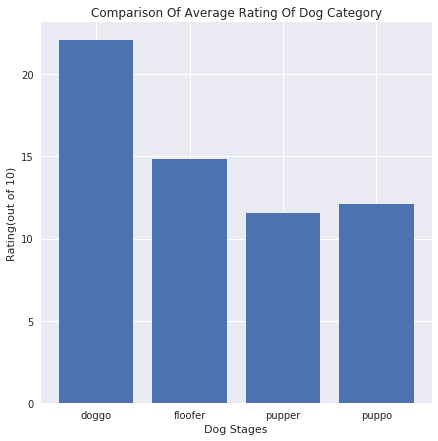

In [112]:
# Plot a bar chart with title, xlabel and ylabel for comparison of average rating Of dog stages
plt.figure(figsize = (7, 7))
plt.bar(mean_rating.index.values, mean_rating, 0.8, alpha = 1)
plt.title('Comparison Of Average Rating Of Dog Category')
plt.xlabel('Dog Stages')
plt.ylabel('Rating(out of 10)');



- It is clear from the graph that puppo has lowest rating while doggo the highest.
- From the pie chart, we can see that there are 77.2% puppers in the overall population of the dataset followed by doggo, then floofer and at the last, puppo. This indicates the possible reason of lowest average rating of pupper and highest average rating of doggo because of huge differences in their proportion in the dataset



### The Distribution of Dog Category

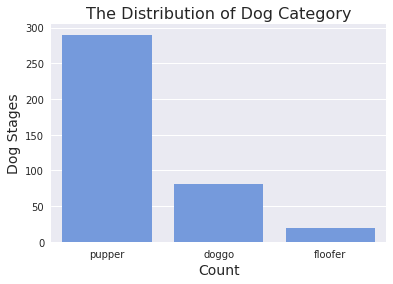

In [113]:
sorted_dog_category = rating_dog['dog_category'].value_counts().head(3).index
sb.set(style="darkgrid")
sb.countplot(data = rating_dog, x = 'dog_category',color='cornflowerblue', order = sorted_dog_category)
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Dog Stages', fontsize=14)
plt.title('The Distribution of Dog Category',fontsize=16);

> Most of the data has pupper type of dog_category.

### The Distribution of Source

Twitter for iPhone     2197
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64


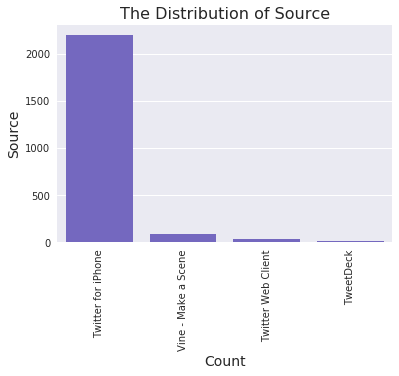

In [114]:
sorted_source = twitter_data_clean['source'].value_counts().index
print(twitter_data_clean['source'].value_counts())
sb.set(style="darkgrid")
sb.countplot(data = twitter_data_clean, x = 'source',color='slateblue', order = sorted_source)
plt.xticks(rotation = 90)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Source', fontsize=14)
plt.title('The Distribution of Source',fontsize=16);

> Source for most of the data on twitter is from Twitter for iPhone, and least from TweetDeck

In [115]:
# subsetting 'image_predictions_clean' with necessary variables
predictions_copy = image_predictions_clean[['tweet_id', 'first_prediction', 'first_confidence', 'first_dog_prediction']].copy()

predictions_copy.head()


,tweet_id,first_prediction,first_confidence,first_dog_prediction
0,666020888022790149,Welsh springer spaniel,0.465074,True
1,666029285002620928,redbone,0.506826,True
2,666033412701032449,German shepherd,0.596461,True
3,666044226329800704,Rhodesian ridgeback,0.408143,True
4,666049248165822465,miniature pinscher,0.560311,True


In [116]:
# value counts of 10 most frequent predictions in a seperate variable
predictions_count = predictions_copy['first_prediction'].value_counts()
predictions_count.head(10).values

array([150, 100,  89,  83,  57,  44,  43,  39,  38,  30])

In [117]:
# Store the prediction names of 10 most frequent predictions in a seperate variable
prediction_names = predictions_copy['first_prediction'].value_counts().head(10).index.values
prediction_names

array(['golden retriever', 'Labrador retriever', 'Pembroke', 'Chihuahua',
       'pug', 'chow', 'Samoyed', 'toy poodle', 'Pomeranian',
       'cocker spaniel'], dtype=object)

### Favorites vs Retweets

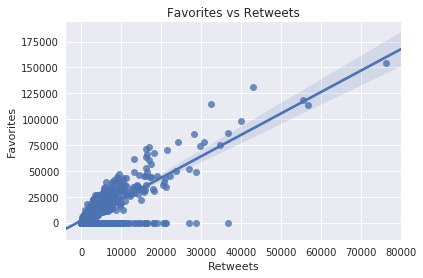

In [118]:
#correlaion between Favorites and Retweets
sb.regplot(x=twitter_data_clean.retweets, y=twitter_data_clean.favorites)
plt.title("Favorites vs Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites');



> I tested out the correlation between ‘retweets’ and ‘favorites’ and it is clear that it is a positive correlation between them, according to pearson's definition.

### Value Counts for top 10 predictions

In [119]:
# Top 10 predictions from image_predictions.csv
predictions_copy['first_prediction'].value_counts().head(10)

golden retriever      150
Labrador retriever    100
Pembroke               89
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy poodle             39
Pomeranian             38
cocker spaniel         30
Name: first_prediction, dtype: int64



Observations for First Prediction Efficiency for top 10 most frequent predictions:

 - The prediction for golden retrievers is the most accurate of other
 - Prediction for Chihuahuas looks to be least accurate.
    The least predictions are recorded for Malamutes and most for Golden Retrievers

Conclusion, this model works in favor of the Golden Retrievers in this dataset


### First Prediction Confidence Distribution

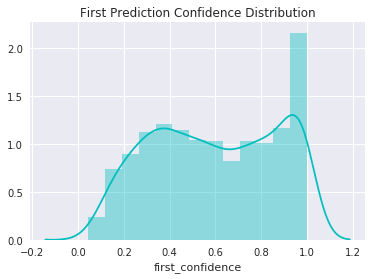

In [121]:
#plotting predictions_copy['first_confidence']
sb.set(style='darkgrid')
ax = sb.distplot(predictions_copy['first_confidence'],color='c')
plt.title('First Prediction Confidence Distribution');

> This chart displays the success rate of model irrespective of type of animal. 

### True and False predictions

Looking for accuracy

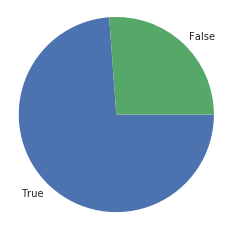

In [122]:
# accuracy of image_prediction's model
sorted_p1 = predictions_copy['first_dog_prediction'].value_counts()
plt.pie(sorted_p1, labels = sorted_p1.index, counterclock = False)
plt.axis('square');



> The Prediction model's accuracy for dog in first predictions is near to 3/4 or can be said as near to 70% which is a not so good accuracy rate for a prediction model.

References:

    - http://docs.tweepy.org/en/latest/`
    - https://www.w3schools.com/python/ref_string_replace.asp
    - https://realpython.com/pandas-merge-join-and-concat/